# ML | Day 4

## DAY 4: EXPLORING THE BREAST CANCER DATASET
 
### •Load the breast cancer data from sklearn into a pandas DataFrame of features and target with their appropriate headers.

### •Extract 10 features with the best correlation with the target alongside the target into a new dataframe.

### •Make a pairplot of the top 5 correlated features.

### Make a copy of this version of the dataframe and for each feature replace all values less than their respective mean with NaN.

In [1]:
import pandas as pd    #import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import sklearn 

In [20]:
from sklearn import datasets

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (C:\Users\lenovo\Anaconda\lib\site-packages\sklearn\inspection\__init__.py)

In [38]:
import seaborn as sns

In [3]:
bc_data= sklearn.datasets.load_breast_cancer()

In [17]:
bc = pd.DataFrame(bc_data.data, columns = bc_data.feature_names)

In [22]:
bc_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
bc['target'] = bc_data.target

In [27]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
bc.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [11]:
bc_data.target.shape

(569,)

In [30]:
bc_corr=bc.corr().loc['target',:]
print(bc_corr)

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [34]:
AB_bc_corr =abs(bc_corr)

In [35]:
print(AB_bc_corr)

mean radius                0.730029
mean texture               0.415185
mean perimeter             0.742636
mean area                  0.708984
mean smoothness            0.358560
mean compactness           0.596534
mean concavity             0.696360
mean concave points        0.776614
mean symmetry              0.330499
mean fractal dimension     0.012838
radius error               0.567134
texture error              0.008303
perimeter error            0.556141
area error                 0.548236
smoothness error           0.067016
compactness error          0.292999
concavity error            0.253730
concave points error       0.408042
symmetry error             0.006522
fractal dimension error    0.077972
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782914
worst area                 0.733825
worst smoothness           0.421465
worst compactness          0.590998
worst concavity            0.659610
worst concave points       0

In [36]:
new_bc= bc[['mean radius','mean perimeter', 'mean area','mean concave points','worst radius','worst perimeter','worst area','worst concave points','mean concavity', 'worst concavity']].copy()

In [37]:
new_bc.head()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,mean concavity,worst concavity
0,17.99,122.80,1001.0,0.14710,25.38,184.60,2019.0,0.2654,0.3001,0.7119
1,20.57,132.90,1326.0,0.07017,24.99,158.80,1956.0,0.1860,0.0869,0.2416
2,19.69,130.00,1203.0,0.12790,23.57,152.50,1709.0,0.2430,0.1974,0.4504
3,11.42,77.58,386.1,0.10520,14.91,98.87,567.7,0.2575,0.2414,0.6869
4,20.29,135.10,1297.0,0.10430,22.54,152.20,1575.0,0.1625,0.1980,0.4000


### Pairplot of the top 5 correlated features

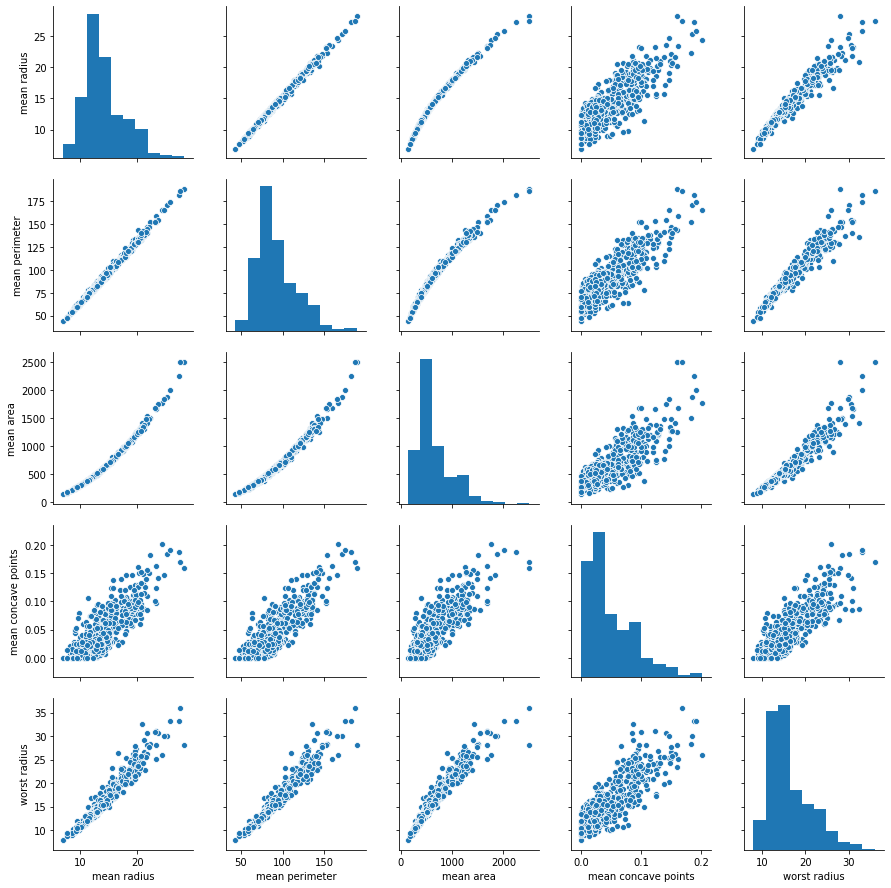

In [39]:
sns.pairplot(new_bc.iloc[:,0:5])

### Replace all values less than their respective mean with NaN.


In [44]:
m_bc = new_bc.copy()

In [45]:
m_bc.head()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,mean concavity,worst concavity
0,17.99,122.80,1001.0,0.14710,25.38,184.60,2019.0,0.2654,0.3001,0.7119
1,20.57,132.90,1326.0,0.07017,24.99,158.80,1956.0,0.1860,0.0869,0.2416
2,19.69,130.00,1203.0,0.12790,23.57,152.50,1709.0,0.2430,0.1974,0.4504
3,11.42,77.58,386.1,0.10520,14.91,98.87,567.7,0.2575,0.2414,0.6869
4,20.29,135.10,1297.0,0.10430,22.54,152.20,1575.0,0.1625,0.1980,0.4000


In [46]:
for i in m_bc.columns[:-1]:#all columns except the last column(target)
    m=m_bc[i].mean()#mean of values in the column
    m_bc.loc[m_bc[i]<m, i]=np.nan#replace all values i that column less than mean by NaN

In [48]:
m_bc.head()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,mean concavity,worst concavity
0,17.99,122.8,1001.0,0.14710,25.38,184.6,2019.0,0.2654,0.3001,0.7119
1,20.57,132.9,1326.0,0.07017,24.99,158.8,1956.0,0.1860,NaN,0.2416
2,19.69,130.0,1203.0,0.12790,23.57,152.5,1709.0,0.2430,0.1974,0.4504
3,NaN,NaN,NaN,0.10520,NaN,NaN,NaN,0.2575,0.2414,0.6869
4,20.29,135.1,1297.0,0.10430,22.54,152.2,1575.0,0.1625,0.1980,0.4000


In [49]:
m_bc.tail()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,mean concavity,worst concavity
564,21.56,142.0,1479.0,0.13890,25.45,166.1,2027.0,0.2216,0.24390,0.4107
565,20.13,131.2,1261.0,0.09791,23.69,155.0,1731.0,0.1628,0.14400,0.3215
566,16.60,108.3,858.1,0.05302,18.98,126.7,1124.0,0.1418,0.09251,0.3403
567,20.60,140.1,1265.0,0.15200,25.74,184.6,1821.0,0.2650,0.35140,0.9387
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
